# Airfoil Self Noise NASA dataset

The self-noise data set used in this example was processed by NASA, and so it is referred here to as the NASA data set. It was obtained from a series of aerodynamic and acoustic tests of two and three-dimensional airfoil blade sections conducted in an anechoic wind tunnel. The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.

# Imports

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

# Load and Inspect Data

In [6]:
file_path = "./DataSets/airfoil_self_noise.dat" 

with open (file_path , 'r' , encoding = 'utf-8' ) as file:
    data = file.read()

rows = data.split('\n')

In [7]:
for row in rows[:5]:
    print(row)

800	0	0.3048	71.3	0.00266337	126.201
1000	0	0.3048	71.3	0.00266337	125.201
1250	0	0.3048	71.3	0.00266337	125.951
1600	0	0.3048	71.3	0.00266337	127.591
2000	0	0.3048	71.3	0.00266337	127.461


---
# Data Description

1. Frequency in Hertzs. **`Freq_hz`**
2. Angle of attack in degrees **`Angle_of_attack`**
3. Chord length, in meters **`Chord_length`**
4. Free-stream velocity, in meters per second **`Free_stream_vel`**
5. Suction side displacement thickness, in meters.**`Disp_thickness`**
6. **`sound_pressure_level`**

In [10]:
cols = ['Freq_hz' , 'Angle_of_attck' , 'Chord_length' , 'Free_Stream_val' , 'Disp_thickness' ,'Sound_pressure_level']

# Making a DataFrame

In [12]:
with open(file_path,'r',encoding='utf-8') as file:
    df = pd.DataFrame([row.rstrip().split('\t') for row in file], columns=cols)

### Or simply we can also do this
```python
df = pd.read_csv(file_path, sep='\t', header=None, names=cols)
```

In [14]:
df.head(10)

,Freq_hz,Angle_of_attck,Chord_length,Free_Stream_val,Disp_thickness,Sound_pressure_level
0,800,0,0.3048,71.3,0.00266337,126.201
1,1000,0,0.3048,71.3,0.00266337,125.201
2,1250,0,0.3048,71.3,0.00266337,125.951
3,1600,0,0.3048,71.3,0.00266337,127.591
4,2000,0,0.3048,71.3,0.00266337,127.461
5,2500,0,0.3048,71.3,0.00266337,125.571
6,3150,0,0.3048,71.3,0.00266337,125.201
7,4000,0,0.3048,71.3,0.00266337,123.061
8,5000,0,0.3048,71.3,0.00266337,121.301
9,6300,0,0.3048,71.3,0.00266337,119.541


# Data Inspection

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Freq_hz               1503 non-null   object
 1   Angle_of_attck        1503 non-null   object
 2   Chord_length          1503 non-null   object
 3   Free_Stream_val       1503 non-null   object
 4   Disp_thickness        1503 non-null   object
 5   Sound_pressure_level  1503 non-null   object
dtypes: object(6)
memory usage: 70.6+ KB


In [17]:
df.describe()

,Freq_hz,Angle_of_attck,Chord_length,Free_Stream_val,Disp_thickness,Sound_pressure_level
count,1503,1503,1503,1503,1503,1503
unique,21,27,6,4,105,1456
top,2000,0,0.0254,39.6,0.00529514,127.315
freq,105,329,278,480,23,3


In [18]:
df.shape

(1503, 6)

# Data Preparation

In [20]:
# Convert columns to numeric types
df = df.apply(pd.to_numeric, errors='coerce')

### X , Y define

In [22]:
# Define feature columns and target variable
feature_columns = [col for col in df.columns if col != 'Sound_pressure_level']
X = df[feature_columns]
Y = df['Sound_pressure_level']

### Alternative Ways to Select Features and Labels

```python
# Direct Column Selection
X = df[['Freq_hz', 'Angle_of_attck', 'Chord_length', 'Free_Stream_val', 'Disp_thickness']]
Y = df['Sound_pressure_level']

# Using iloc for Column Indices
X = df.iloc[:, :-1]  # Select all columns except the last one
Y = df.iloc[:, -1]   # Select the last column

# Using loc for Column Names
X = df.loc[:, ['Freq_hz', 'Angle_of_attck', 'Chord_length', 'Free_Stream_val', 'Disp_thickness']]
Y = df.loc[:, 'Sound_pressure_level']

# Using List Comprehension for Dynamic Column Selection
feature_columns = [col for col in df.columns if col != 'Sound_pressure_level']
X = df[feature_columns]
Y = df['Sound_pressure_level']


### Split data 

In [25]:
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size = 0.3 , random_state = 50)

# Model Training

In [27]:
# from sklearn.linear_model import LinearRegression # imported above
model = LinearRegression()
model.fit(X_train , Y_train)

LinearRegression()

# Predictions and Evaluation

In [29]:
predictions = model.predict(X_test)

# Display the shape and first few predictions
print(predictions.shape)

# Create a DataFrame to compare actual vs. predicted values
comparison_df = pd.DataFrame({
    'Actual Values': Y_test.values,
    'Predicted Values': predictions
})

# Display the any 20 rows of the comparison DataFrame
comparison_df.sample(10)

(451,)


,Actual Values,Predicted Values
398,130.987,129.312878
390,123.514,118.956915
205,125.211,123.229333
421,132.354,131.202826
346,131.279,126.640269
103,125.721,123.851844
292,128.265,121.813746
210,133.707,135.926208
254,107.284,114.355114
310,122.101,122.276276


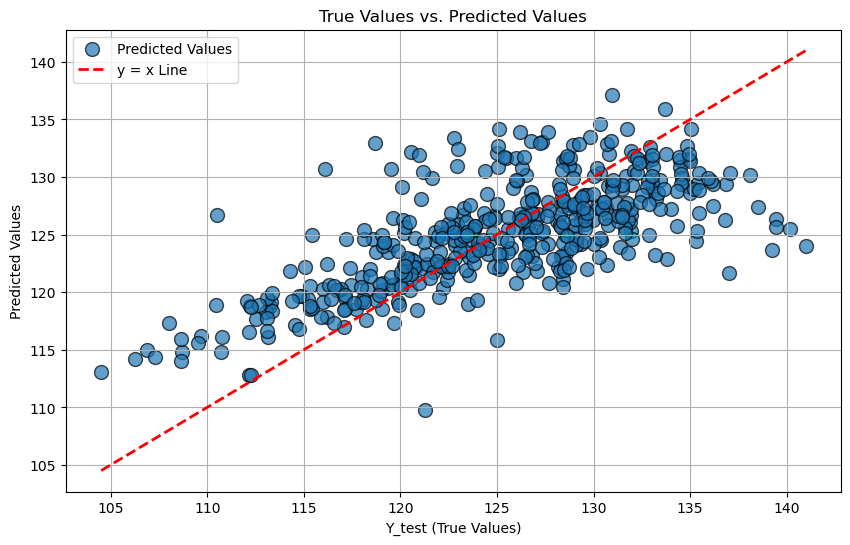

In [30]:
# Scatter plot of true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.7, edgecolors='k', s=100, label='Predicted Values')

# Add a y=x line
min_val = min(Y_test.min(), predictions.min())
max_val = max(Y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='y = x Line')

# Labeling
plt.xlabel('Y_test (True Values)')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Evaluating the Model

In [32]:
# Evaluate the model

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('Explained Variance Score:', metrics.explained_variance_score(Y_test, predictions))

Mean Absolute Error (MAE): 3.7994983691780964
Mean Squared Error (MSE): 23.629625707470627
Root Mean Squared Error (RMSE): 4.861031341955185
Explained Variance Score: 0.49089803511614805


In [33]:
metrics.explained_variance_score(Y_test , predictions)   

0.49089803511614805

In [34]:
# Display the coefficients of the model
cdf = pd.DataFrame(model.coef_, feature_columns, columns=['Coeff'])

In [35]:
cdf

,Coeff
Freq_hz,-0.001271
Angle_of_attck,-0.492657
Chord_length,-36.340507
Free_Stream_val,0.093308
Disp_thickness,-123.542078
